In [1]:
# HyperDT tutorial

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from hyperdt.tree import DecisionTreeClassifier as ControlDT, HyperbolicDecisionTreeClassifier as HyperDT
from sklearn.tree import DecisionTreeClassifier as SklearnDT

from hyperdt.ensemble import RandomForestClassifier as ControlRF, HyperbolicRandomForestClassifier as HyperRF
from sklearn.ensemble import RandomForestClassifier as SklearnRF

from hyperdt.toy_data import wrapped_normal_mixture
from hyperdt.visualization import plot_tree

from sklearn.model_selection import train_test_split

INFO: Using numpy backend


## Preliminaries

In [4]:
# Generate some data

X, y = wrapped_normal_mixture(num_points=1000, num_classes=5, num_dims=2, seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt_args = {"max_depth": 3, "min_samples_split": 2, "min_samples_leaf": 1}
rf_args = {"n_estimators": 100, **dt_args}

## HyperDT

In [6]:
# Train a control decision tree

control_dt = ControlDT(**dt_args)
control_dt.fit(X_train, y_train)
control_dt.score(X_test, y_test)

0.72

In [7]:
# Verify that scikit-learn matches

sklearn_dt = SklearnDT(**dt_args)
sklearn_dt.fit(X_train, y_train)
sklearn_dt.score(X_test, y_test)

0.72

In [8]:
# Train a hyperbolic decision tree

hyper_dt = HyperDT(**dt_args)
hyper_dt.fit(X_train, y_train)
hyper_dt.score(X_test, y_test)

0.75

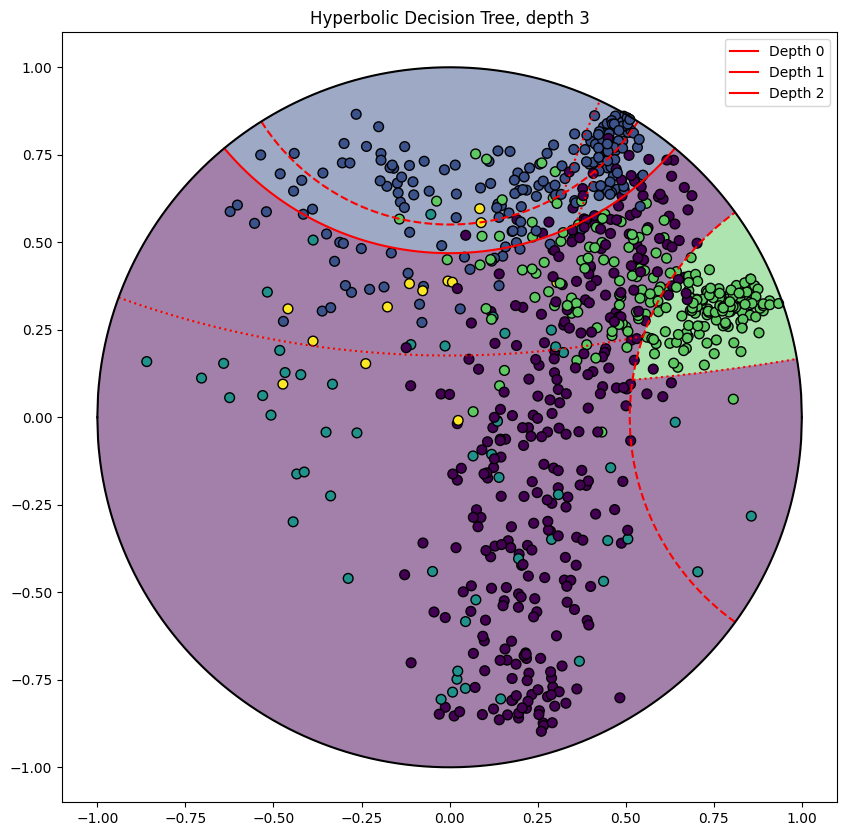

In [9]:
# Let's visualize the splits!

ax = plot_tree(hyper_dt, X_train, y_train)
ax.set_title("Hyperbolic Decision Tree, depth 3")
plt.show()

## HyperRF

In [10]:
# Train a control random forest

np.random.seed(42)
control_rf = ControlRF(**rf_args)
control_rf.fit(X_train, y_train)
control_rf.score(X_test, y_test)

0.695

In [11]:
# Scikit-learn actually does not match exactly, because of stochasticity in the random forest affecting resampling

np.random.seed(42)
sklearn_rf = SklearnRF(**rf_args)
sklearn_rf.fit(X_train, y_train)
sklearn_rf.score(X_test, y_test)

0.7

In [12]:
# Train a hyperbolic random forest

np.random.seed(42)
hyper_rf = HyperRF(**rf_args, n_jobs=-1)
hyper_rf.fit(X_train, y_train)
hyper_rf.score(X_test, y_test)

0.79